# Beginner’s Guide to Building Neural Networks in TensorFlow
If you’re reading this you’ve probably had some exposure to neural networks and TensorFlow, but you might feel somewhat daunted by the various terms associated with deep learning that are often glossed over or left unexplained in many introductions to the technology. This article will shine a light on some of these topics by doing an in-depth walkthrough of TensorFlow 2.0’s beginner tutorial.
#  You’ll Learn
After reading this you’ll have a better understanding of some key conceptual topics and TensorFlow/Keras implementation of those topics (Keras is a deep learning library built on top of TensorFlow).
Conceptual:

Neural network layer shapes

Activation functions (such as Relu and Softmax)

Logits

Dropout

Optimizers

Loss

Epochs

# TensorFlow/Keras functions:

tf.keras.layers.Sequential()

tf.keras.layers.Flatten()

tf.keras.layers.Dense()

model.compile()

model.fit()

# The Data
The data that the TensorFlow 2.0 beginner tutorial uses is the MNIST dataset which is considered a kind of “Hello, World!” for neural networks and deep learning, and it can be downloaded directly from Keras. It is a dataset full of hand-drawn digits ranging from 0–9 with a corresponding label describing what digit the drawing is supposed to be depicting.

The idea behind working with this dataset is that we want to be able to train a model that learns what kinds of shapes correspond to digits 0–9 and that subsequently is able to correctly label images that it hasn’t trained on. 

On a high level, the model built in the beginner tutorial takes in training images as inputs and tries to classify those images as a digit from 0–9. If it makes an incorrect prediction, it will make mathematical adjustments to better predict similar images. Once the model has finished training, it will be tested on images that it hasn’t trained on to get a final assessment of how well the model performs.

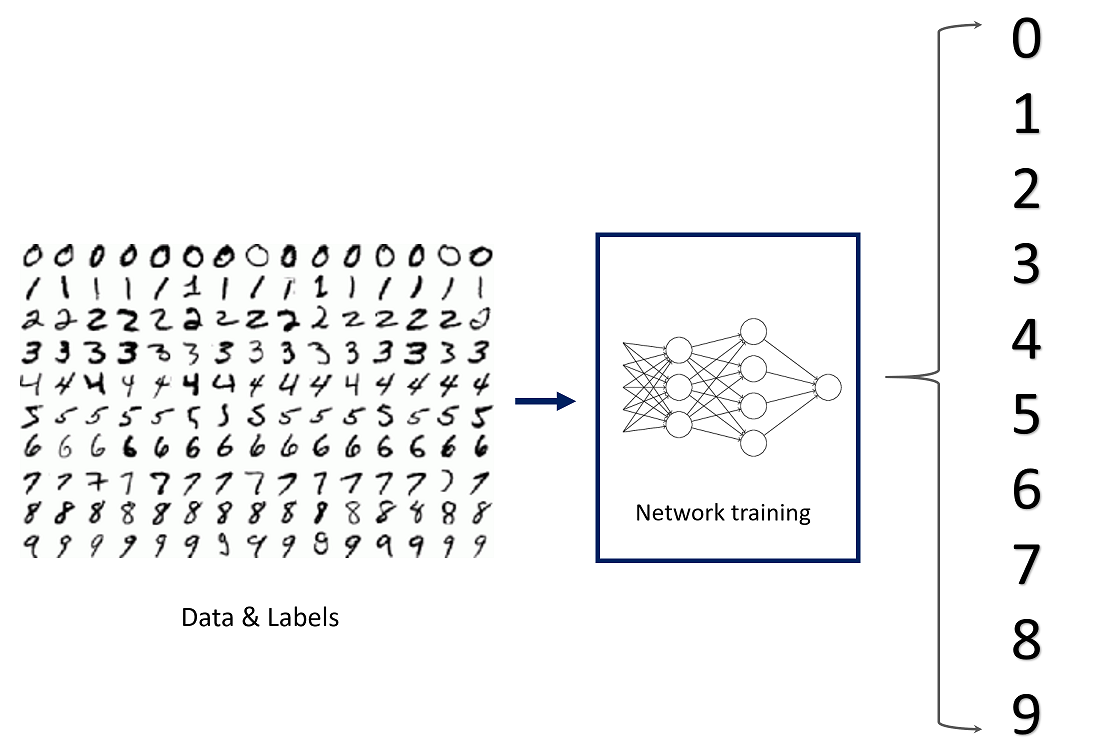

# Understanding the Beginner Notebook
Now let’s take a deep dive into how TensorFlow implements this basic neural network.
# Loading the data
After doing some set up in the first cell, the notebook starts by loading the MNIST dataset from the Keras library using its load_data() function which returns two tuples as shown in the code. Documentation can be found here.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


It will be helpful to understand what this data actually looks like as we go into exploring what TensorFlow does with it.

Looking that these results we can see that there are 70k total images in the dataset, 60k training and 10k testing. The two 28’s indicate that each image is 28 pixels by 28 pixels and images are represented as 28x28 arrays filled with pixel values as can be seen in the following visualization

In [3]:
print( x_train.shape)
#(60000, 28, 28)
print( y_train.shape)
#(60000,)
print( x_test.shape)
#(10000, 28, 28)
print( y_test.shape)
#(10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The last step that the notebook performs to prepare the data is converting every pixel value in each image to a floating-point number between 0.0–1.0. This is done to help with the scale in the math involved in producing a prediction for each image.

**x_train, x_test = x_train / 255.0, x_test / 255.0**

# Building the model structure
Perhaps the most confusing part of this notebook is the part where the model structure is created.


In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

The purpose of this code is to specify what kind of layers are going to be present in our neural net. The first component of this is the **tf.keras.models.Sequential()** call. All this function does is begin the creation of a linear (or “sequential”) arrangement of layers. All the other code in the above snippet detail which layers will be in the model and how they will be arranged.
The next line of code **tf.keras.layers.Flatten(input_shape=(28,28))** creates the first layer in our network. Intuitively, we want to be able to use all of the information in an image to predict what digit it is, and so the input layer should have a node for each pixel in an image. Each image has 28*28 =784 values and so Flatten() creates a layer with 784 nodes that contain each pixel value for a given image. If we had color images that contain 3 values for each pixel (RGB values) then Flatten() would create a layer with 28*28*3 = 2352 nodes.

The other kind of layer we see in the model is created using **tf.keras.layers.Dense()** which creates what is called a fully-connected or densely-connected layer. This can be compared to a sparsely-connected layer and the distinction has to do with how information is passed between nodes in adjacent layers.
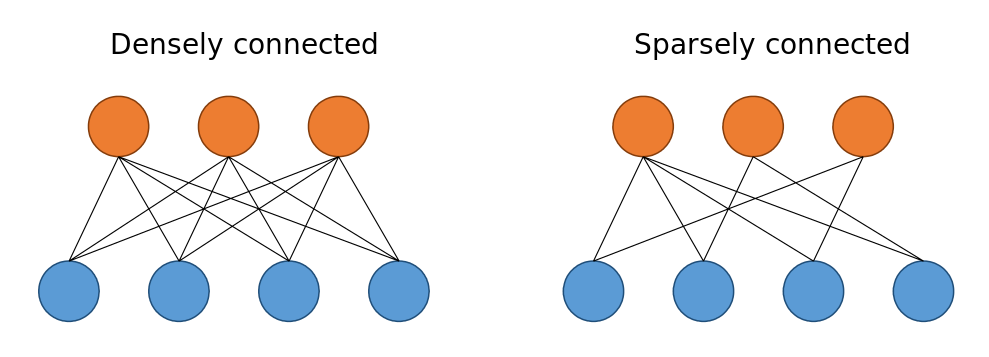

You can see that in a densely-connected layers, each node in one layer is connected to each node in the next layer, whereas in sparsely-connected layers this is not the case. And so what Dense() does is create a layer that is fully connected to the layer that precedes it. The first parameter (128 in the first instance) specifies how many nodes should be in the layer. The number of nodes in hidden layers (layers that aren’t the input or output layers) is somewhat arbitrary but an important thing to note is that the output layer has a number of nodes equal to how many classes the model is trying to predict. In this case, the model is trying to predict between 10 different digits and so the final layer in the model has 10 nodes. This is crucial because the output for each node of the final layer will be a probability that a given image is a particular digit.

In order to understand the rest of code in this snippet we need to develop an understanding of activation functions and dropout.

# Activation 

As important as the layout and structure of a neural net is, it’s good to remember that, at the end of the day, what a neural net does is a lot of math. Each node takes the values of the nodes in the previous layer and computes a weighted sum of them, producing a scalar value which is called a logit. Much like how a neuron in the human brain “fires” when prompted by certain inputs, we must specify how each node (which are also sometimes referred to as neurons) in our network “fires” when it is given certain inputs. This is what activation functions do. They take logits, the results of the aforementioned weighted sum, and convert them to an “activation” based on what function is being used.
A common activation function, and the one used in the first Dense() layer in our network, is called “ReLU” which is short for rectified linear unit.

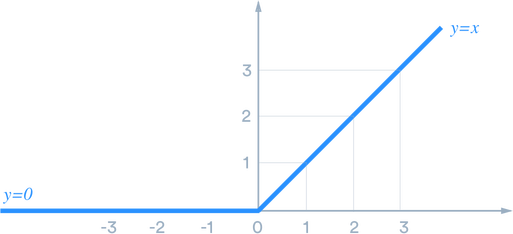

What **ReLU** does is make the activation of any negative logits 0 (the node does not fire), while leaving any positive logits unchanged (the node fires with strength linearly proportional to the strength of the input). For more information on the power of ReLU and why it is useful check out this article.
https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7

Another common activation function, and the one that is used in the second instance of Dense(), is called **“softmax”**.
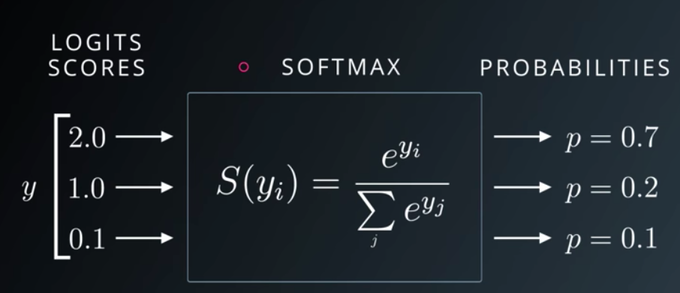

As the image above shows, softmax takes the logits computed by the weighted sum of the activations from the previous layer and converts them to probabilities that sum to 1.0. This makes it an extremely useful activation function to use in our output layer because it provides easy-to-interpret results for the likelihood of an image being a particular digit.
There are many other activation functions and deciding which one to use is often a matter of experimentation or heuristic judgement (or both). A good overview of some other activation functions can be found here 
https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0(I recommend reading it if you’re having trouble understanding why activation functions are necessary in the first place).

# Dropout

The last unexplained piece of the code snippet we’ve been examining so far is the call of **tf.keras.layers.Dropout()**. The concept of dropout goes back to the earlier discussion of the connectivity of layers, and has to do specifically with a few drawbacks associated with densely-connected layers. One of the drawbacks of densely-connected layers is that it can lead to very computationally-expensive neural nets. With each node transmitting information to every other node in the next layer, the complexity of the weighted sums computed in each node increases exponentially with the number of nodes in each layer. Another drawback is that with so much information being passed from layer to layer, models can have a tendency to overfit to the training data, ultimately hurting performance.
This is where dropout comes in. Dropout makes it so some of the nodes in a given layer don’t pass on their information to the next layer. This helps with computation time and with overfitting. So in the beginner notebook, the call of Dropout(0.2) in between the two Dense() layers makes it so that each node in the first Dense() layer has a 0.2 probability of being dropped from the computation of the activations of the next layer. You might have caught on that this effectively makes the output layer in the model a sparsely-connected layer.

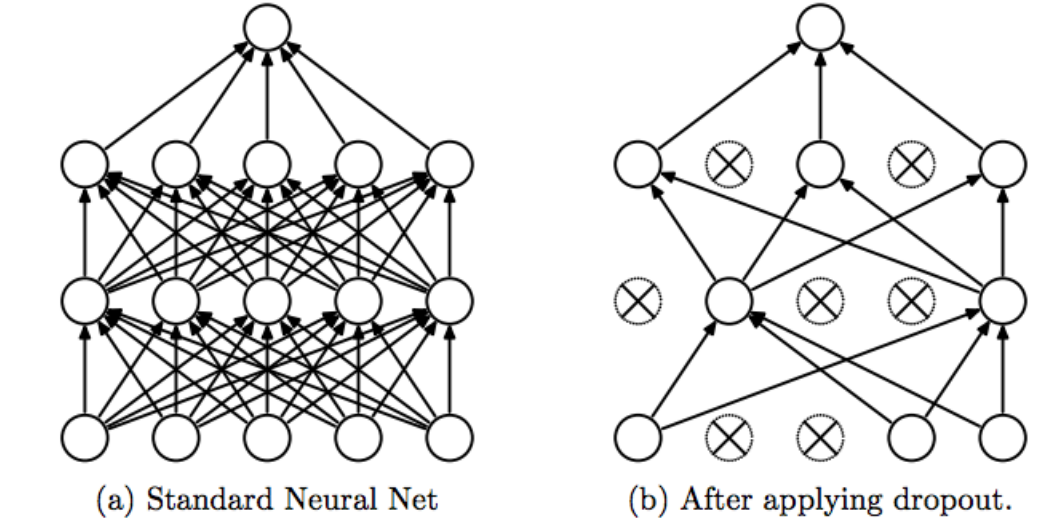

Now that we understand all the components of our model, let’s take advantage of the **model.summary()** function and do a sanity check on what our network structure looks like.



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


After double checking the output shapes, it all looks good, so now let’s move on to compiling, training, and running the model!
Compiling, Training, and Running the Neural Net
Now that we’ve specified what our neural net looks like, the next step is to tell Tensorflow how to train it.
Compiling the model
The snippet of code we’ll be examining in this section is the following:


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The **model.compile()** function is called on a pre-built model and it specifies the **loss function, optimizer, and metrics**, each of which will be explained. These are important features of how a neural network produces its final predictions.
# Loss Function
At the beginning of this guide, it was mentioned that on a high-level, the model built in the beginner notebook will learn how to classify certain images as digits and it does this by making a prediction, seeing how far off its prediction was from the correct answer, and then updating itself to better predict those kinds of digits. The loss function is the part of the model that quantifies how far off a prediction is from the correct answer. Different kinds of models are going to need different kinds of loss functions. For example, the loss function for a problem like this one where the outputs to our model are probabilities would have to very different from the loss function of a model that is trying to predict something like price in dollars. The loss function for this particular model is ‘sparse_categorical_crossentropy’ which is good for multiclass-classification problems like this one. In our case, if the model predicts that an image has only a small probability of being its actual label, that will lead to a high loss
# Optimizer
Another way of expressing what training a model actually means is that it seeks to minimize the loss. If loss is a measurement of how far off a prediction is from the correct answer, and a higher loss means a more incorrect prediction, seeking to minimize the loss is a quantifiable way of determining how well a model is performing. As was mentioned earlier, a key part of training neural nets is revising the mathematics parameters of the nodes of a network based off of how effective those parameters were in classifying an image. In a process called backpropagation, neural nets use a mathematical tool called gradient descent to update parameters to improve the model. The details of those terms are somewhat outside of the scope of this guide but for the purposes of understanding what the beginner notebook is doing, the optimizer parameter of the model.compile() function specifies a way for making the backpropagation process more faster and more effective. The “adam” optimizer is a commonly used optimizer and works fine for this problem.
# Metrics
The last part of the model.compile() function is specifying the metrics it should use in evaluating the model. Accuracy is a useful, but imperfect metric, for gauging model performance and it should be used by itself with a some amount of caution (for more on why that is and some other potential metrics, you can take a look at this article).
https://towardsdatascience.com/hackcvilleds-4636c6c1ba53

# Training the model
At long last comes actually training the model, and with TensorFlow 2.0, this is very easy to do.

In [7]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 351us/sample - loss: 2.5173 - accuracy: 0.7667
Epoch 2/5
60000/60000 [==============================] - 10s 158us/sample - loss: 0.5992 - accuracy: 0.8448
Epoch 3/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.4932 - accuracy: 0.8733
Epoch 4/5
60000/60000 [==============================] - 11s 183us/sample - loss: 0.4359 - accuracy: 0.8854
Epoch 5/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.4036 - accuracy: 0.8965


This line of code is pretty intuitive, passing the training data and the correct labels of that data. The epoch parameter in the model.fit() function is the number of times the model sees all of the training data. The reason why we want the model to see all of the training data multiple times is that one go-through might not be enough for the model to sufficiently update its weights when computing weighted sums to make a marked improvement in predictive power.

Running this code, you can see that in each epoch, the model goes through all 60k images in the training set. You can also see the the loss decreases and the accuracy increases with each epoch, meaning that the model is getting better and better at classifying digits with each epoch.
Evaluating the model

And finally, using **model.evaluate(x_test, y_test**, we can predict the classes of our test set and see how our model performs.

In [9]:
model.evaluate(x_test, y_test,verbose=0)

[0.27679566007256506, 0.9348]